<a href="https://colab.research.google.com/github/Sunngttssu/Audio-Sentiment-Analysis/blob/main/Sentiment%20Analysis%20Model%20Building%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive files and load the files and the model that was saved
from google.colab import drive
drive.mount('/content/drive')

import joblib
import tensorflow as tf
import os

save_dir = '/content/drive/MyDrive/Sentiment_Analysis'
X = joblib.load(os.path.join(save_dir, 'X_optimized.joblib'))
y = joblib.load(os.path.join(save_dir, 'y_optimized.joblib'))
mean = joblib.load(os.path.join(save_dir, 'mean.joblib'))
std = joblib.load(os.path.join(save_dir, 'std.joblib'))
model = tf.keras.models.load_model(os.path.join(save_dir, 'emotion_recognition_model_optimized.h5'))

print("Files loaded successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Files loaded successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Ravetess.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('/content/RAVTESS_Data')

In [ ]:
# Load the necessary modules for inline plotting and math functions:
%pylab inline

# Your code using matplotlib and numpy would go here.
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/RAVTESS_Data/Audio_Speech_Actors_01-24/Actor_02/03-01-01-01-01-01-02.wav')

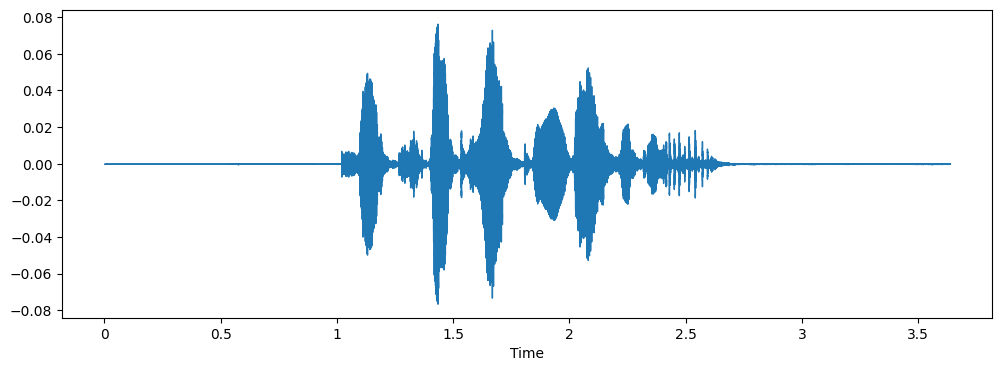

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming 'data' and 'sampling_rate' are already loaded

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()  # Explicitly display the plot

# Training, Testing & Model Building

--- Data loaded. Loading time: 234.26974439620972 seconds ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 120)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 300, 64)   │     38,464 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 300, 64)   │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 300, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 150, 64)   │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 150, 64)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 150, 128)  │     41,088 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 150, 128)  │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 150, 128)  │     82,048 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 150, 128)  │      8,320 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 150, 128)  │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 150, 128)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 75, 128)   │          0 │ activation_2[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 75, 256)   │    164,096 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 256)   │      1,024 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 75, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                 

 Total params: 7,655,624 (29.20 MB)

 Trainable params: 7,650,888 (29.19 MB)

 Non-trainable params: 4,736 (18.50 KB)

Epoch 1/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.1889 - loss: 2.6278 - val_accuracy: 0.2766 - val_loss: 2.3341 - learning_rate: 0.0010
Epoch 2/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2718 - loss: 2.0570 - val_accuracy: 0.2512 - val_loss: 1.9840 - learning_rate: 0.0010
Epoch 3/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3292 - loss: 1.8026 - val_accuracy: 0.2315 - val_loss: 2.2604 - learning_rate: 0.0010
Epoch 4/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3806 - loss: 1.6493 - val_accuracy: 0.3194 - val_loss: 1.7232 - learning_rate: 0.0010
Epoch 5/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4670 - loss: 1.4522 - val_accuracy: 0.3484 - val_loss: 1.7925 - learning_rate: 0.0010
Epoch 6/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5250 - loss: 1.2804 - val_accuracy: 0.4861 - val_loss: 1.4801 - learning_rate: 0.0010
Epoch 7/300
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6078 - 

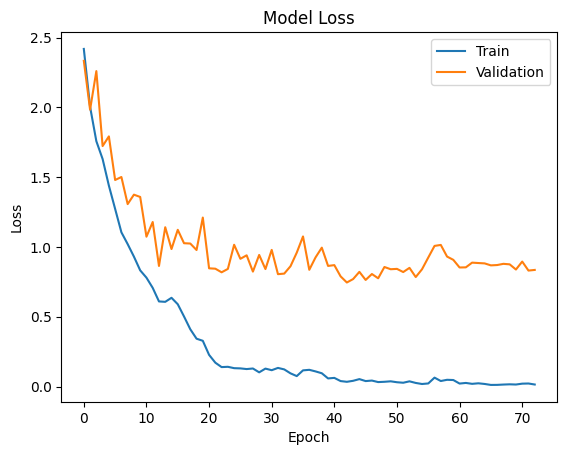

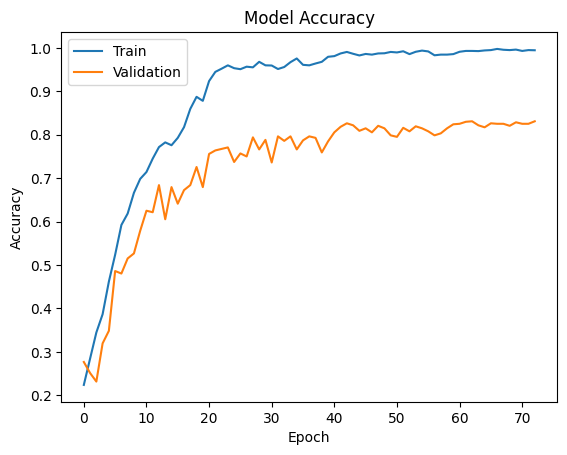

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8182 - loss: 0.7518
Test accuracy: 82.41%
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.77      0.91      0.83       122
           2       0.95      0.74      0.83       126
           3       0.68      0.76      0.72       109
           4       0.93      0.88      0.90       113
           5       0.81      0.79      0.80       113
           6       0.88      0.82      0.85       109
           7       0.89      0.90      0.90       122

    accuracy                           0.82       864
   macro avg       0.82      0.82      0.82       864
weighted avg       0.84      0.82      0.83       864

[[ 38   7   0   2   0   3   0   0]
 [  2 111   0   7   0   1   1   0]
 [  8   3  93   7   2   7   1   5]
 [  3  15   1  83   1   3   3   0]
 [  1   0   2   1  99   1   7   2]
 [  3   1   2  13   2  89   0   3]
 [  2   7   0   4   2   2  89   3]
 [  2   1   0   5   0   4   0 110]]
MODEL SAVED


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 120)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 300, 64)   │     38,464 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 300, 64)   │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 300, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 150, 64)   │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 150, 64)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 150, 128)  │     41,088 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 150, 128)  │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 150, 128)  │     82,048 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 150, 128)  │      8,320 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 150, 128)  │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 150, 128)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 75, 128)   │          0 │ activation_2[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 75, 256)   │    164,096 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 256)   │      1,024 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 75, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                 

 Total params: 7,655,626 (29.20 MB)

 Trainable params: 7,650,888 (29.19 MB)

 Non-trainable params: 4,736 (18.50 KB)

 Optimizer params: 2 (12.00 B)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8182 - loss: 0.7518
Restored model, accuracy: 82.41%


In [ ]:
#Importing Libraries
import time
import os
import librosa
import numpy as np
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation, BatchNormalization, Add, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Data augmentation functions
def add_noise(data, noise_factor=0.005):
    noise = np.random.normal(0, noise_factor, len(data))
    return data + noise

def pitch_shift(data, sr, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

# Data loading and preprocessing
path = '/content/RAVTESS_Data'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.wav'):
            try:
                # Load audio file
                X, sample_rate = librosa.load(os.path.join(subdir, file), sr=None, res_type='kaiser_fast')

                # Extract MFCCs, delta, and delta-delta
                mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T
                delta = librosa.feature.delta(mfccs.T).T
                delta2 = librosa.feature.delta(mfccs.T, order=2).T
                features = np.concatenate([mfccs, delta, delta2], axis=1)  # Shape: (frames, 120)

                # Pad or truncate to 300 frames
                if features.shape[0] < 300:
                    pad_width = 300 - features.shape[0]
                    features_padded = np.pad(features, ((0, pad_width), (0, 0)), mode='constant')
                else:
                    features_padded = features[:300, :]

                file_label = int(file[7:8]) - 1
                lst.append((features_padded, file_label))

                # Data augmentation
                X_noise = add_noise(X)
                mfccs_noise = librosa.feature.mfcc(y=X_noise, sr=sample_rate, n_mfcc=40).T
                delta_noise = librosa.feature.delta(mfccs_noise.T).T
                delta2_noise = librosa.feature.delta(mfccs_noise.T, order=2).T
                features_noise = np.concatenate([mfccs_noise, delta_noise, delta2_noise], axis=1)
                if features_noise.shape[0] < 300:
                    pad_width = 300 - features_noise.shape[0]
                    features_noise = np.pad(features_noise, ((0, pad_width), (0, 0)), mode='constant')
                else:
                    features_noise = features_noise[:300, :]
                lst.append((features_noise, file_label))

                X_pitch = pitch_shift(X, sample_rate)
                mfccs_pitch = librosa.feature.mfcc(y=X_pitch, sr=sample_rate, n_mfcc=40).T
                delta_pitch = librosa.feature.delta(mfccs_pitch.T).T
                delta2_pitch = librosa.feature.delta(mfccs_pitch.T, order=2).T
                features_pitch = np.concatenate([mfccs_pitch, delta_pitch, delta2_pitch], axis=1)
                if features_pitch.shape[0] < 300:
                    pad_width = 300 - features_pitch.shape[0]
                    features_pitch = np.pad(features_pitch, ((0, pad_width), (0, 0)), mode='constant')
                else:
                    features_pitch = features_pitch[:300, :]
                lst.append((features_pitch, file_label))

            except ValueError:
                continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

# Unzip features and labels
X, y = zip(*lst)
X = np.array(X)  # Shape: (num_samples, 300, 120)
y = np.array(y)

# Save processed data
save_dir = '/content/RAVTESS_Data'
joblib.dump(X, os.path.join(save_dir, 'X_optimized.joblib'))
joblib.dump(y, os.path.join(save_dir, 'y_optimized.joblib'))

# Load data
X = joblib.load('/content/RAVTESS_Data/X_optimized.joblib')
y = joblib.load('/content/RAVTESS_Data/y_optimized.joblib')

# Split into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalize the data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 1e-8
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Residual block
def residual_block(x, filters, kernel_size=5):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    shortcut = Conv1D(filters, 1, padding='same')(shortcut)  # Match dimensions
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    return x

# Define the CNN model with residual connections
inputs = Input(shape=(300, 120))
x = Conv1D(64, 5, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = residual_block(x, 128)
x = residual_block(x, 256)
x = residual_block(x, 512)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(8, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

# Learning rate scheduler
def lr_scheduler(epoch):
    lr = 0.001 * (0.5 ** (epoch // 20))
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Train the model
cnnhistory = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr, lr_schedule],
    class_weight=class_weights
)

# Plot training history
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy: {:5.2f}%".format(100 * acc))

# Make predictions
predictions = np.argmax(model.predict(X_test), axis=1)

# Print classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Save the model
model.save('emotion_recognition_model_optimized.h5')
print("MODEL SAVED")

# Load and verify the model
new_model = tf.keras.models.load_model('emotion_recognition_model_optimized.h5')
new_model.summary()
loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
!pip install sounddevice

In [ ]:
!apt-get install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0
!pip install sounddevice --upgrade

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (181 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpac

# Mean and Standard Deviation of Training Data for Live Prediction of ".wav audio" file

In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split

# Load the saved data
X = joblib.load('/content/RAVTESS_Data/X_optimized.joblib')
y = joblib.load('/content/RAVTESS_Data/y_optimized.joblib')

# Split into training, validation, and testing sets (same splits as original)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Compute mean and std
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 1e-8

# Save mean and std
joblib.dump(mean, '/content/RAVTESS_Data/mean.joblib')
joblib.dump(std, '/content/RAVTESS_Data/std.joblib')

print("Mean and std saved successfully.")

# Live prediction of audio for the saved model

In [ ]:
#from google.colab import drive
import librosa
import numpy as np
import tensorflow as tf
import joblib
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
save_dir = '/content/drive/MyDrive/Sentiment_Analysis'
model_path = os.path.join(save_dir, 'emotion_recognition_model_optimized.h5')
mean_path = os.path.join(save_dir, 'mean.joblib')
std_path = os.path.join(save_dir, 'std.joblib')

# Verify file existence for model, mean, and std
if not os.path.exists(model_path):
  raise FileNotFoundError(f"Model file not found at {model_path}")
if not os.path.exists(mean_path):
  raise FileNotFoundError(f"Mean file not found at {mean_path}")
if not os.path.exists(std_path):
  raise FileNotFoundError(f"Std file not found at {std_path}")

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Load mean and std used for normalization during training
mean = joblib.load(mean_path)
std = joblib.load(std_path)

# Set parameters
sr = 48000  # sampling rate (RAVDESS default)
n_mfcc = 40
max_frames = 300

# Get audio file path from user
audio_file = input("Enter the path to the audio file (e.g., /content/test_audio.wav): ").strip()

# Verify audio file existence
if not os.path.exists(audio_file):
  raise FileNotFoundError(f"Audio file not found at {audio_file}")
if not audio_file.lower().endswith('.wav'):
  raise ValueError("Audio file must be in .wav format")

# Load audio file
print("Loading audio...")
try:
  audio, _ = librosa.load(audio_file, sr=sr, mono=True)
  print("Audio loaded.")
except Exception as e:
  raise RuntimeError(f"Failed to load audio: {str(e)}")

# Extract features
try:
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T  # (frames, 40)
  delta = librosa.feature.delta(mfccs.T).T  # (frames, 40)
  delta2 = librosa.feature.delta(mfccs.T, order=2).T  # (frames, 40)
  features = np.concatenate([mfccs, delta, delta2], axis=1)  # (frames, 120)
except Exception as e:
  raise RuntimeError(f"Failed to extract features: {str(e)}")

# Pad or truncate to max_frames
if features.shape[0] < max_frames:
  pad_width = max_frames - features.shape[0]
  features_padded = np.pad(features, ((0, pad_width), (0, 0)), mode='constant')
else:
  features_padded = features[:max_frames, :]

# Normalize the features
features_normalized = (features_padded - mean) / std

# Prepare input for the model
features_input = np.expand_dims(features_normalized, axis=0)  # (1, 300, 120)

# Make prediction
try:
  prediction = model.predict(features_input)
  predicted_class = np.argmax(prediction, axis=1)[0]
except Exception as e:
  raise RuntimeError(f"Failed to make prediction: {str(e)}")

# Map the predicted class to emotion
emotions = {
         0: 'neutral',
         1: 'calm',
         2: 'happy',
         3: 'sad',
         4: 'angry',
         5: 'fearful',
         6: 'disgust',
         7: 'surprised'
}
predicted_emotion = emotions[predicted_class]
print(f"Predicted emotion: {predicted_emotion}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Enter the path to the audio file (e.g., /content/test_audio.wav): /content/Recording (9).wav
Loading audio...
Audio loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted emotion: happy
